###  22698401 - Bùi Tấn Phát


In [2]:
#import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load file dữ liệu vào dataframe
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### 1. EDA dữ liệu

In [4]:
#a. Có bao nhiêu đặc trưng và tên đặc trưng 
eda_column = df.columns[1: -1]
print(f'Có {len(eda_column)} cột')
print(f'Tên các đặc trưng {list(eda_column)}')

Có 4 cột
Tên các đặc trưng ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [5]:
#b. Có bao nhiêu chủng loài
eda_species = df['Species'].unique()
print(f'Có {len(eda_species)} chủng loài')
print(f'Gồm: {list(eda_species)}')

Có 3 chủng loài
Gồm: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [6]:
#c. Tổng quan dữ liệu kiểu dữ liệu và dữ liệu thiếu
df[eda_column].info()

#Hàm info cho thấy có 150 dòng dữ liệu và không có 
#thuộc tính nào bị thiếu dữ liệu trên các dòng

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
#d. Thống kê các đại lượng cơ bản cho các đặc trưng
eda_statis = df[eda_column].describe()
eda_statis

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#e. Thống kê các đại lượng cơ bản cho các đặc trưng theo nhóm chủng loại
df.groupby('Species')[eda_column].describe()

SepalLengthCm                                              \
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm         ... PetalLengthCm      PetalWidthCm  \
                       count   mean  ...           75%  max        count   
Species                              ...                                   
Iris-setosa             50.0  3.418  ...         1.575  1.9         50.0   
Iris-versicolor         50.0  2.770  ...         4.600  5.1         50.0   
Iris-virginica          50.0  2.974  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

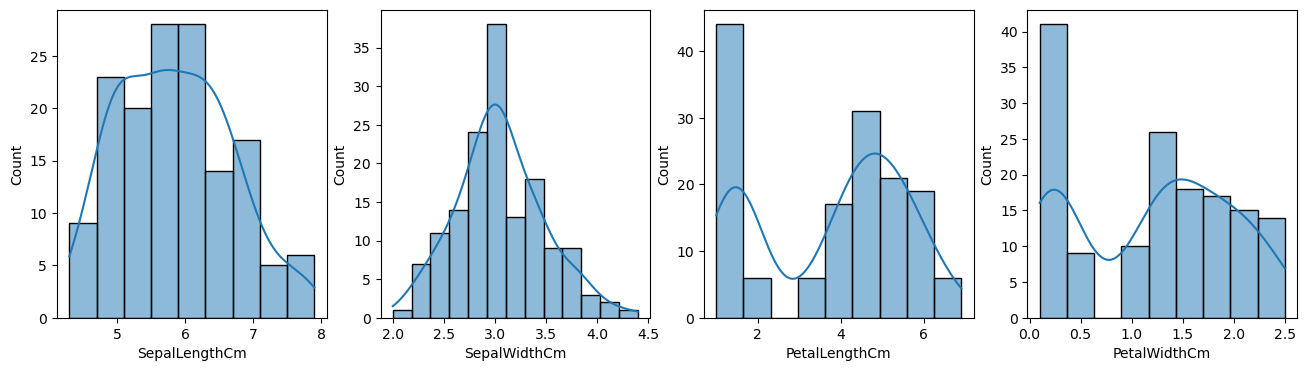

In [9]:
#f. Trực quan phân phối các đặc trưng và nhận xét 
fig = plt.figure(figsize=(16, 4))

for i in range(len(eda_column)):
    fig.add_subplot(1,4, i+1)
    sns.histplot(data=df, x = eda_column[i], kde=True)

#Nhận xét: Em nhận thấy có lẽ chỉ có đặc trưng 'SepalWidthCm' là gần với phân phối chuẩn vì đồ thị có hình chuông và
#  dữ liệu xuất hiện nhiều nhất hầu như tại giá trị trung bình (3.054000)
# Còn lại 'SepalLengthCm' lệch nhẹ về phải
# Và 2 đặc trưng là 'PetalLengthCm' và 'PetalWidthCm' lệch về bên trái.

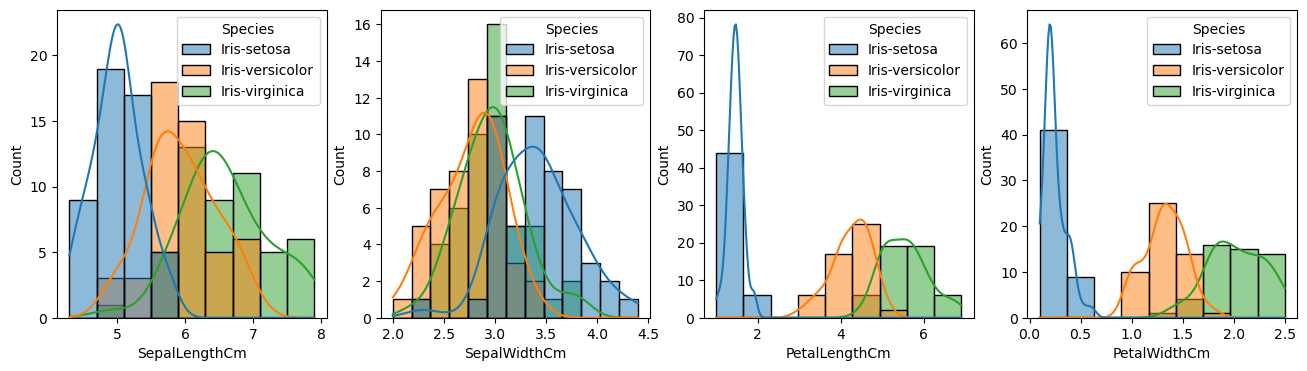

In [10]:
#g. Trực quan phân phối các đặc trưng theo nhóm chủng loài và nhận xét 
fig = plt.figure(figsize=(16, 4))

for i in range(len(eda_column)):
    fig.add_subplot(1,4, i+1)
    sns.histplot(data=df, x = eda_column[i], hue='Species', kde=True)

#Nhận xét: Em thấy giá trị của các đặc trưng trên cánh hoa 'Petal' giữa các loài ít chồng chéo nhau
#==> Giá trị này có thể dùng để phân biệt các loài hoa... Và có vẻ như đồ thị đều gần giống hình chuông.

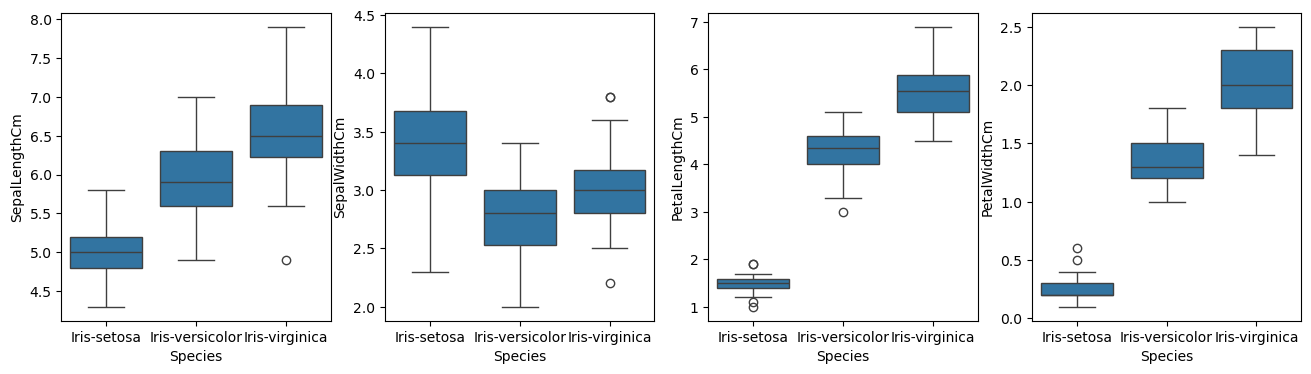

In [11]:
# h. Khám phá các giá trị bất thường của các đặc trưng theo nhóm chủng loài 
fig = plt.figure(figsize=(16, 4))

for i in range(len(eda_column)):
    fig.add_subplot(1,4, i+1)
    sns.boxplot(data=df, x = 'Species', y= eda_column[i])


#### 2. Tập dữ liệu sử dụng tỉ lệ train:test là 75:25 với hệ số ngẫu nhiên là 16 

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Chuẩn bị dữ liệu:

X = df.iloc[:, 1:-1].values
# le = LabelEncoder()
# y = le.fit_transform(df[['Species']])
y = df[['Species']]

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, df.index, test_size=0.25, random_state=16)

#### 3. Sử dụng biểu đồ để tìm giá trị K tốt nhất cho mô hình K-NN dựa theo độ đo chính xác để đánh giá. 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

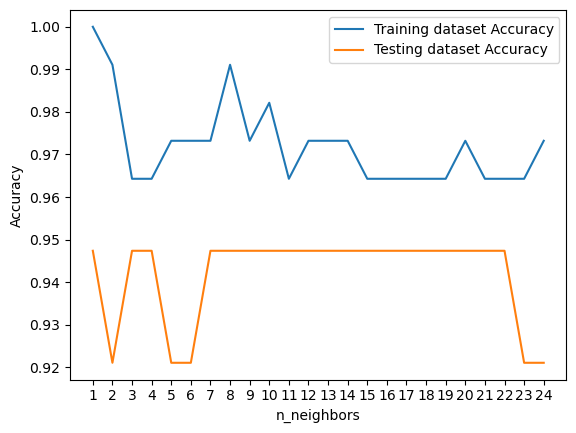

In [13]:
import numpy as np 
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    #Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

#Generate plot
plt.plot(neighbors, train_accuracy, label= 'Training dataset Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.xticks(np.arange(1, 25), np.arange(1, 25))
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

#### 4. Sử dụng giá trị K tốt nhất để xây dựng mô hình

In [14]:
knnModel = KNeighborsClassifier(n_neighbors=11)
knnModel.fit(X_train, y_train)

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

#### 5. Cho biết độ đo chính xác (accuracy) trên tập dữ liệu đánh giá (test data set) 

In [15]:
print(knnModel.score(X_test, y_test))

0.9473684210526315


#### 6. Xây dựng ma trận confusion matrix của mô hình trên tập dữ liệu test 

In [16]:
from sklearn.metrics import confusion_matrix

y_test_predicted = knn.predict(X_test)

cfmx = confusion_matrix(y_test, y_test_predicted)

print(cfmx)


[[13  0  0]
 [ 0 13  2]
 [ 0  1  9]]


#### 7. Với chủng loại: Iris-setosa 

In [17]:
# a. Hãy cho biết các giá trị: [tn, fp, fn, tp], [TPR, FNR, FPR, TNR], [precision, recal, F1] 
TP = cfmx[0, 0] 
FN = np.sum(cfmx[0, 1:])  # Setosa bị nhầm thành loại khác
FP = np.sum(cfmx[1:, 0])  # Mẫu khác bị nhầm thành Setosa
TN = np.sum(cfmx) - (TP + FN + FP)  # Các giá trị còn lại

# Tính các chỉ số
TPR = TP / (TP + FN) 
FNR = FN / (TP + FN)  
FPR = FP / (FP + TN)  
TNR = TN / (FP + TN)  
Precision = TP / (TP + FP)  
F1_score = 2 * (Precision * TPR) / (Precision + TPR) 

# In kết quả
print(f"TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}")
print(f"TPR (Recall): {TPR:.2f}, FNR: {FNR:.2f}, FPR: {FPR:.2f}, TNR: {TNR:.2f}")
print(f"Precision: {Precision:.2f}, F1-score: {F1_score:.2f}")

TP: 13, FN: 0, FP: 0, TN: 25
TPR (Recall): 1.00, FNR: 0.00, FPR: 0.00, TNR: 1.00
Precision: 1.00, F1-score: 1.00


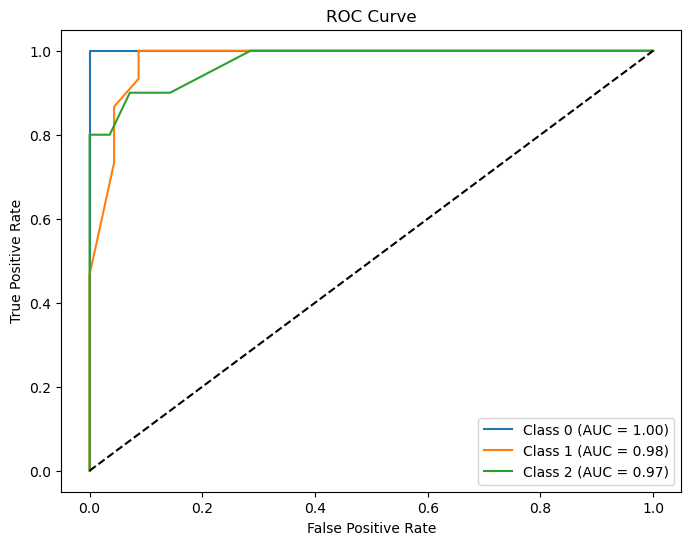

In [18]:
# b. Vẽ đồ thị AUC & ROC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Chuyển y_test thành dạng nhị phân (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
n_classes = y_test_bin.shape[1]

# Dự đoán xác suất với mô hình KNN
y_score = knn.predict_proba(X_test)

# Vẽ đồ thị ROC cho từng lớp
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

# Vẽ đường chéo ngẫu nhiên (baseline)
plt.plot([0, 1], [0, 1], 'k--')

# Cấu hình đồ thị
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

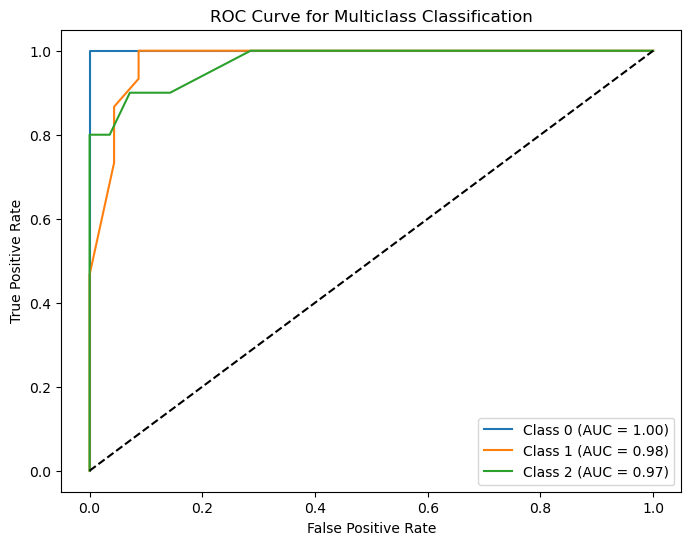

In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Chuyển y_test thành dạng nhị phân (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
n_classes = y_test_bin.shape[1]

# Dự đoán xác suất với mô hình KNN
y_score = knn.predict_proba(X_test)

# Vẽ đồ thị ROC cho từng lớp
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

# Vẽ đường chéo ngẫu nhiên (baseline)
plt.plot([0, 1], [0, 1], 'k--')

# Cấu hình đồ thị
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.show()


#### 8. Lưu trữ mô hình với tên file iris_knn

In [20]:
import pickle 
pickle.dump(knnModel, open('model_KNN_iris.sav', 'wb'))

#### 9. Xây dựng chương trình dự báo chủng loại dựa trên các đặc trưng đầu vào.

In [21]:
loaded_model = pickle.load(open('model_KNN_iris.sav', 'rb'))

v1 = float(input('SepalLengthCmage: '))
v2 = float(input('SepalWidthCm: '))
v3 = float(input('PetalLengthCm: '))
v4 = float(input('PetalWidthCm: '))

y_pred = loaded_model.predict([[v1, v2, v3, v4]])
y_pred

array(['Iris-virginica'], dtype=object)

#### 10. Với các đặc trưng SepalLengthCm=4.5, SepalWidthCm=2.7, PetalLengthCm=2.0, PetalWidthCm=0.24 thì mô hình phân lớp sẽ dự báo là chủng loại nào? 

'Iris-setosa'